#THIS NOTEBOOK USES PRAW (Python Wrapper API); If you wish to run this notebook, please use your own API credentials

In [ ]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Authentication
reddit = praw.Reddit(client_id='',
                     client_secret='',
                     user_agent='',
                     username='',
                     password='')

In [ ]:
# Define functions for future data scraping

In [ ]:
def get_posts(sub_name, n):
    subreddit = reddit.subreddit(sub_name)
    posts_list = []

    for submission in subreddit.top(limit=n):
        info_list = []
        info_list.append(submission.id)   # Output: the submission's title
        info_list.append(submission.score)  # Output: the submission's score
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(submission.subreddit)
        posts_list.append(info_list)

    a = sorted(posts_list, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(a, columns = ['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df

In [ ]:
def get_comments(subm_id, n):

    com_list = []
    submission = reddit.submission(id = subm_id)
    i = 0
    for comment in submission.comments:
        info_list = []
            # Top 3 comments for each submission
        if i <= n:
            info_list.append(comment.id)
            info_list.append(comment.score)
            info_list.append(comment.author)
            info_list.append(submission.subreddit)
            #info_list.append(submission.comments.list()[i].body)
            i += 1
            com_list.append(info_list)
        else:
            break

    a = sorted(com_list, key=lambda x: x[1], reverse = True)
    com_df = pd.DataFrame(a)
    return com_df

In [ ]:
def get_user_posts(author, n):

    redditor = reddit.redditor(author)
    user_posts_list = []

    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(submission.id)
        info_list.append(submission.score)
        info_list.append(str(submission.author))
        info_list.append(submission.num_comments)
        info_list.append(str(submission.subreddit))
        user_posts_list.append(info_list)

    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df

# Initial Analysis of r/SuicideWatch

In [ ]:
# First we scrape 1000 posts, then using submission id, scrape most popular comments of every post and append it to the
# dataframe with comments
df = get_posts('SuicideWatch', 1000)

In [ ]:
df.shape # Explore posts dataframe

(992, 5)

In [ ]:
df.head(10)

,id,score,author,num_comments,subreddit
0,ma96y1,3809,None,130,SuicideWatch
1,f9d5go,3026,cleopatra_97,315,SuicideWatch
2,kbqsnq,2860,_crustysocks_,162,SuicideWatch
3,e8gjky,2824,Fantastic-Profession,350,SuicideWatch
4,jnrz57,2781,throwaway-or-smthn,146,SuicideWatch
5,juklnk,2775,throwwowwoy,139,SuicideWatch
6,n77bnn,2709,phosTR,191,SuicideWatch
7,hy8bh6,2671,Bittybot5000,77,SuicideWatch
8,kgxxg9,2654,None,144,SuicideWatch
9,l49603,2587,freddy_plays_csgo,104,SuicideWatch


In [ ]:
df.author.nunique()

787

In [ ]:
df.subreddit.nunique()

1

In [ ]:
df['score'].describe()

count     992.000000
mean      807.181452
std       405.860304
min       443.000000
25%       547.750000
50%       681.500000
75%       924.250000
max      3809.000000
Name: score, dtype: float64

In [ ]:
df['num_comments'].describe()

count    992.000000
mean      86.436492
std       49.592853
min       16.000000
25%       53.000000
50%       74.000000
75%      106.000000
max      371.000000
Name: num_comments, dtype: float64

<Axes: xlabel='score', ylabel='num_comments'>

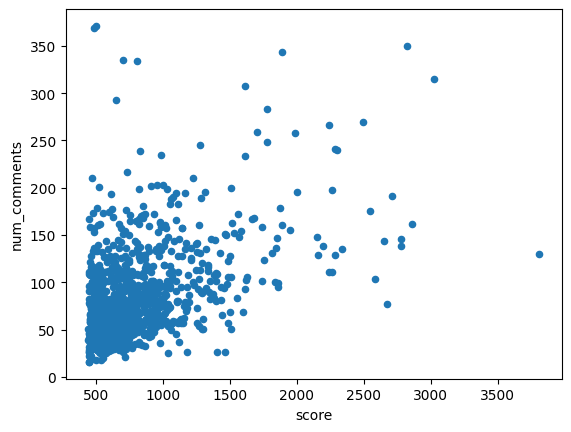

In [ ]:
df.plot('score', 'num_comments', kind = 'scatter' )

# Analysis based on a r/Depression

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
marvel_df = get_posts('depression', 500) # This is where you can define any subreddit and


In [ ]:
marvel_df.author.nunique() # Out of 500, 400 are unique

400

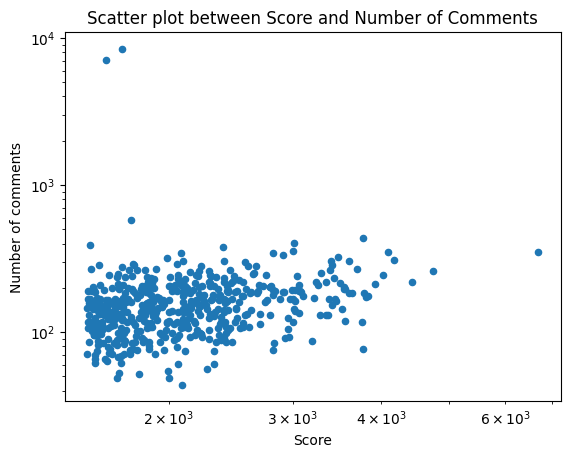

In [ ]:
# See the relationship between comments and upvotes
ax = marvel_df.plot('score', 'num_comments', kind = 'scatter',logx=True, logy=True, title='Scatter plot between Score and Number of Comments')
ax.set(xlabel="Score", ylabel="Number of comments")
plt.savefig("ScatterPlot",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
repeating = marvel_df[marvel_df.duplicated(['author'], keep = False)] # Only take users who posted more than once

In [ ]:
repeating = repeating[repeating.author != 'None'] # Get rid of deleted users

In [ ]:
repeating.author.nunique() # Out of 500 posts, this is the amount of people who posted more than once

12

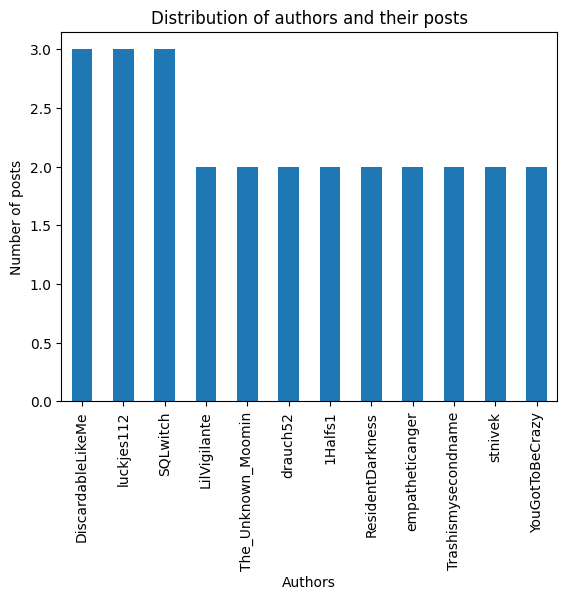

In [ ]:
# See the distrubution of authors and their posts
ax = repeating.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts')
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
# Compiling a list of authors that appeared more than once on subreddit's top of all times
# (Used for network graph and for get_user_posts function)
u_authors = list(repeating.author.unique())

In [ ]:
u_authors

['DiscardableLikeMe',
 'LilVigilante',
 'The_Unknown_Moomin',
 'drauch52',
 'luckjes112',
 '1Halfs1',
 'ResidentDarkness',
 'empatheticanger',
 'SQLwitch',
 'Trashismysecondname',
 'stnivek',
 'YouGotToBeCrazy']

In [ ]:
authors_df =  pd.DataFrame() # Makes an empty dataframe
authors_df = authors_df.fillna(0)
for u in u_authors: # Loops through every "influencer" user and gets 10 top posts per user
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c])

In [ ]:
authors_df

,0,1,2,3,4
0,phwoex,33249,DiscardableLikeMe,500,Minecraft
1,mgkzfk,11793,DiscardableLikeMe,149,Minecraft
2,ud1pdz,8333,DiscardableLikeMe,132,HollowKnight
3,zrl1vu,5879,DiscardableLikeMe,169,Minecraft
4,mg9h6e,5371,DiscardableLikeMe,96,HollowKnight
5,m13hwc,5093,DiscardableLikeMe,51,Minecraftbuilds
6,un83i6,5005,DiscardableLikeMe,91,Minecraft
7,m44sv2,4726,DiscardableLikeMe,245,HollowKnight
8,uyuu1k,3723,DiscardableLikeMe,88,HollowKnight
9,t2nrmp,3481,DiscardableLikeMe,15,HollowKnightMemes


In [ ]:
authors_df = authors_df.rename(index=str, #renaming column names
                               columns={0: "id", 1: "score", 2: "author", 3: "num_comments", 4: "subreddit"})

In [ ]:
authors_df.head(10) # Dataframe of other subreddits where authors posted

,id,score,author,num_comments,subreddit
0,phwoex,33249,DiscardableLikeMe,500,Minecraft
1,mgkzfk,11793,DiscardableLikeMe,149,Minecraft
2,ud1pdz,8333,DiscardableLikeMe,132,HollowKnight
3,zrl1vu,5879,DiscardableLikeMe,169,Minecraft
4,mg9h6e,5371,DiscardableLikeMe,96,HollowKnight
5,m13hwc,5093,DiscardableLikeMe,51,Minecraftbuilds
6,un83i6,5005,DiscardableLikeMe,91,Minecraft
7,m44sv2,4726,DiscardableLikeMe,245,HollowKnight
8,uyuu1k,3723,DiscardableLikeMe,88,HollowKnight
9,t2nrmp,3481,DiscardableLikeMe,15,HollowKnightMemes


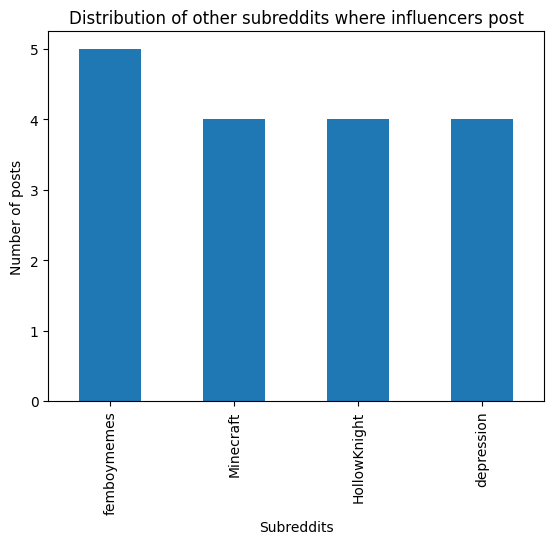

In [ ]:
counts = authors_df['subreddit'].value_counts()
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post')
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

# Network Analysis

## Initial approach

In [ ]:
n_df = authors_df[['author', 'subreddit']] # Create a dataframe for network graph purposes
n_df.head()

,author,subreddit
0,DiscardableLikeMe,Minecraft
1,DiscardableLikeMe,Minecraft
2,DiscardableLikeMe,HollowKnight
3,DiscardableLikeMe,Minecraft
4,DiscardableLikeMe,HollowKnight


In [ ]:
n_df

,author,subreddit
0,DiscardableLikeMe,Minecraft
1,DiscardableLikeMe,Minecraft
2,DiscardableLikeMe,HollowKnight
3,DiscardableLikeMe,Minecraft
4,DiscardableLikeMe,HollowKnight
5,DiscardableLikeMe,Minecraftbuilds
6,DiscardableLikeMe,Minecraft
7,DiscardableLikeMe,HollowKnight
8,DiscardableLikeMe,HollowKnight
9,DiscardableLikeMe,HollowKnightMemes


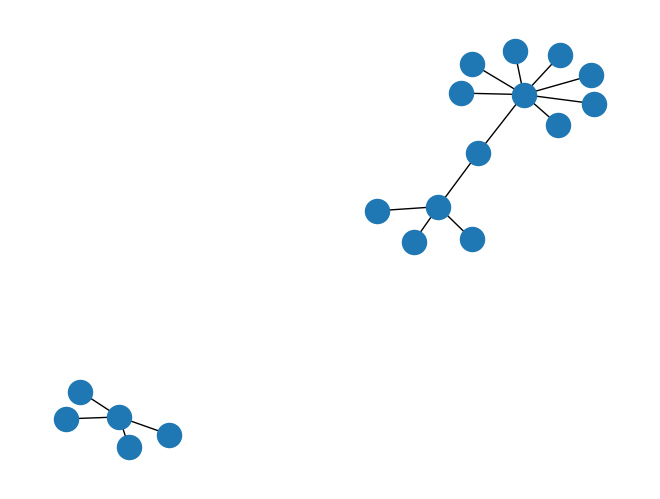

In [ ]:
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') # Initial approach
nx.draw(g)

## Final Approach

In [ ]:
subs = list(n_df.subreddit.unique()) # Make list of unique subreddits to use in network graph

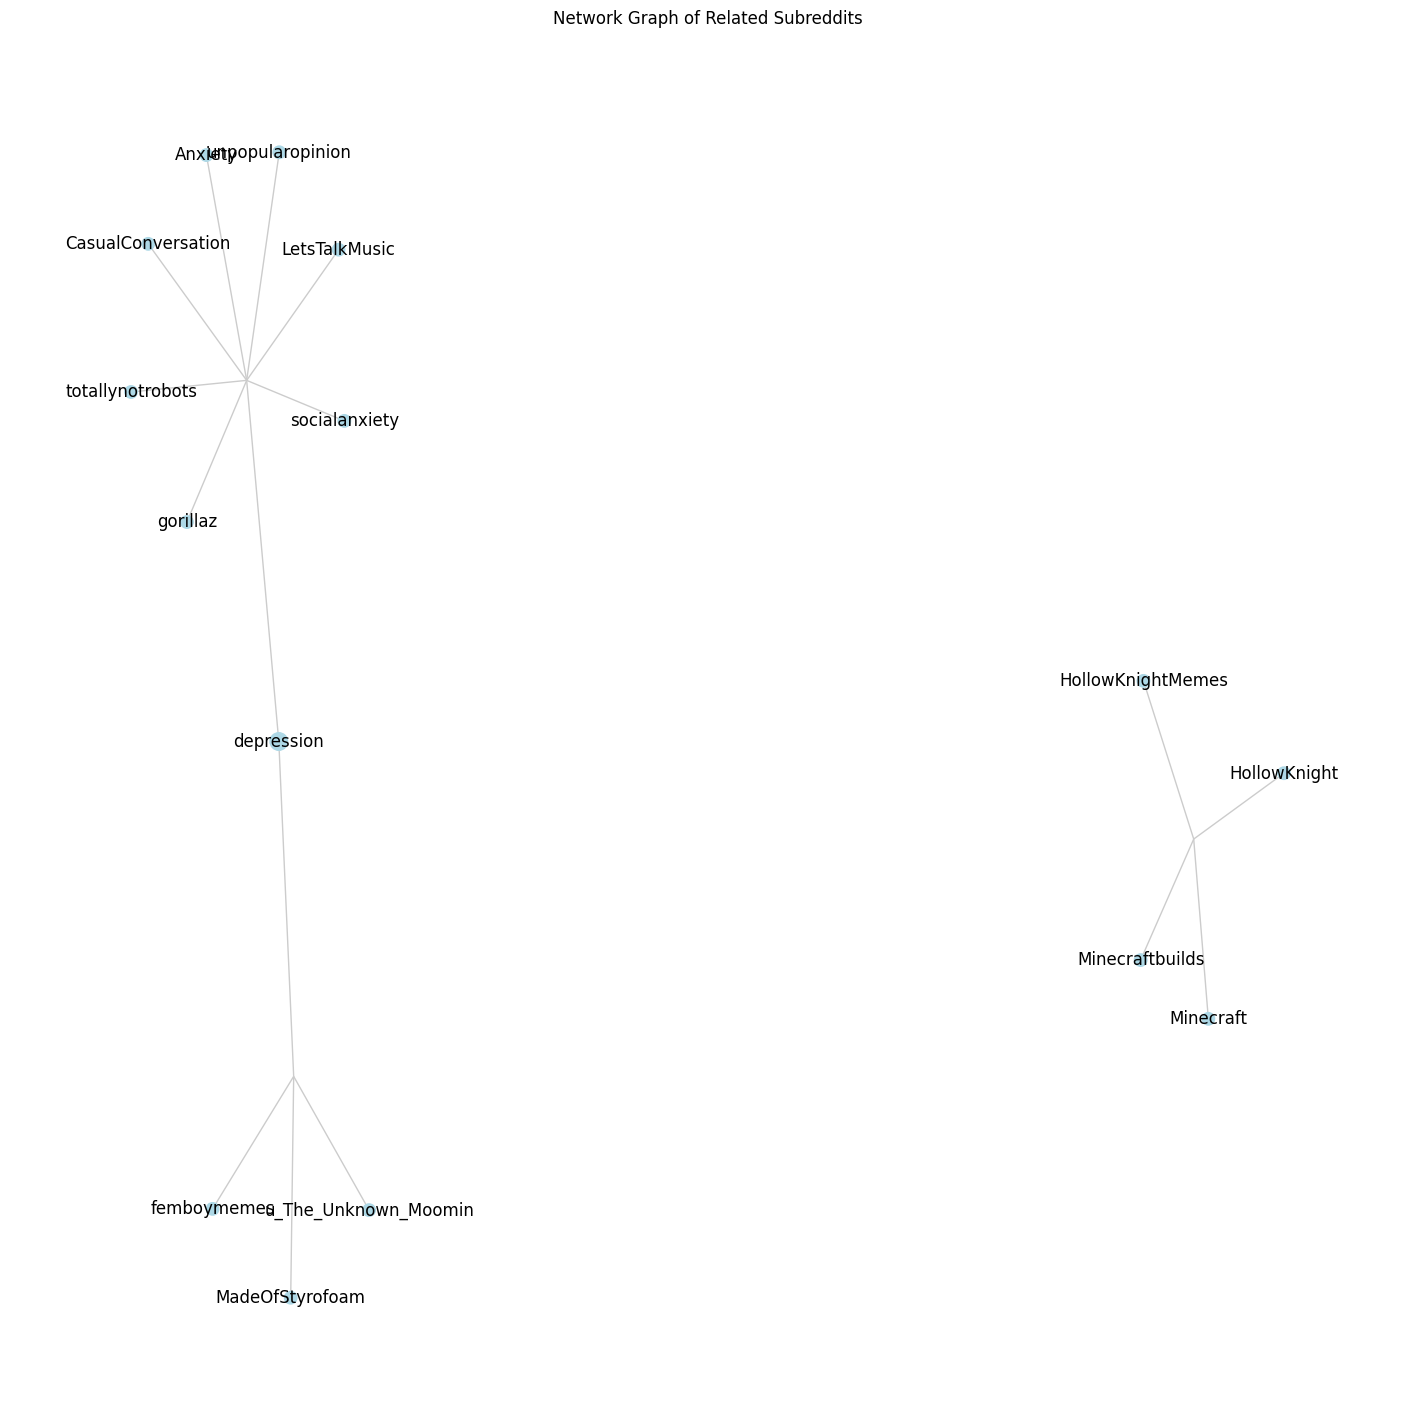

In [ ]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit')

# layout for nodes
layout = nx.spring_layout(g,iterations=50,scale=2)

# Go through every subbreddit, ask the graph how many connections it has.
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g,
                       layout,
                       nodelist=subs,
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

# No axis needed
plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [ ]:
g.degree('depression') # To check the number of out-degrees for a subreddit, if interested

2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from nltk.corpus import stopwords
import re

# Load your CSV file with comments
df = pd.read_csv('reddit_depression_suicidewatch.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

df['processed_comment'] = df['text'].apply(preprocess_text)

# Create a document-term matrix
vectorizer = CountVectorizer(max_df=0.85, max_features=1000)
dtm = vectorizer.fit_transform(df['processed_comment'])

# Fit an LDA model
num_topics = 2  # You can adjust this based on your needs
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Assign topics to comments
df['topic'] = lda.transform(dtm).argmax(axis=1)

# Display the results
print(df[['comment', 'topic']])


In [ ]:
df

,text,processed_comment,topic
0,I recently went through a breakup and she said...,recently went breakup said still wants friends...,0
1,"I do not know how to navigate these feelings, ...",know navigate feelings new feeling stretch und...,1
2,"So I have been with my bf for 5 months , and h...",bf months already told depressed week nothing ...,0
3,I am so exhausted of this. Just when I think I...,exhausted think finally rest think maybe thing...,0
4,I have been severly bullied since i was 5 till...,severly bullied since till resulted depressed ...,0
...,...,...,...
20359,I took 50mg of seroquel a few hours after I dr...,took mg seroquel hours drank panicking please ...,1
20360,that is what has happened to me last week. And...,happened last week week depression also insomn...,1
20361,Ever just feel alone in a house full of people...,ever feel alone house full people room crying ...,1
20362,Politicians. Neighbors. Corporations. Society....,politicians neighbors corporations society cul...,0


array([[<Axes: title={'center': 'topic'}>]], dtype=object)

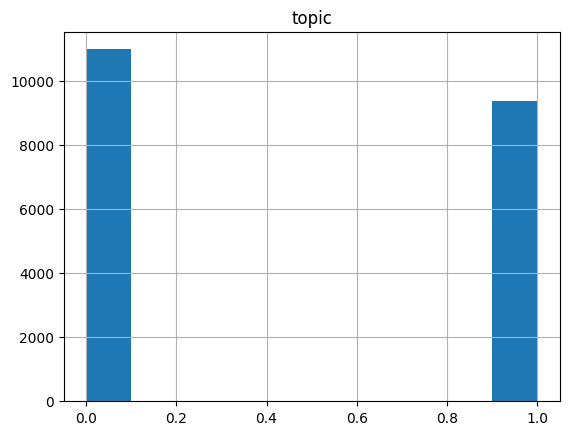

In [ ]:
df.hist("topic")

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nfsne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

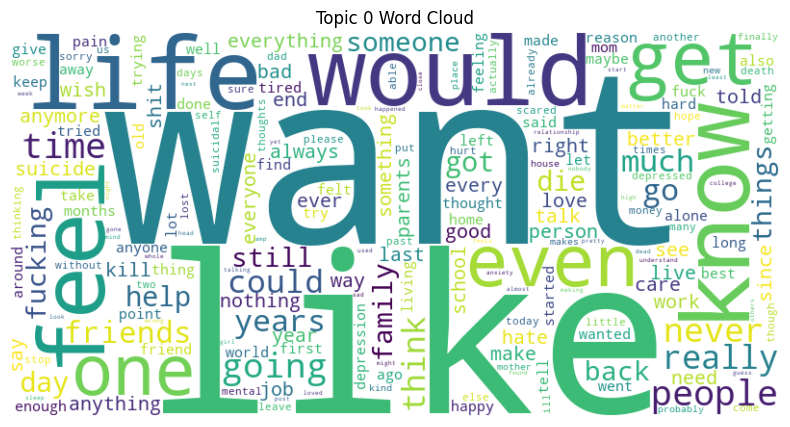

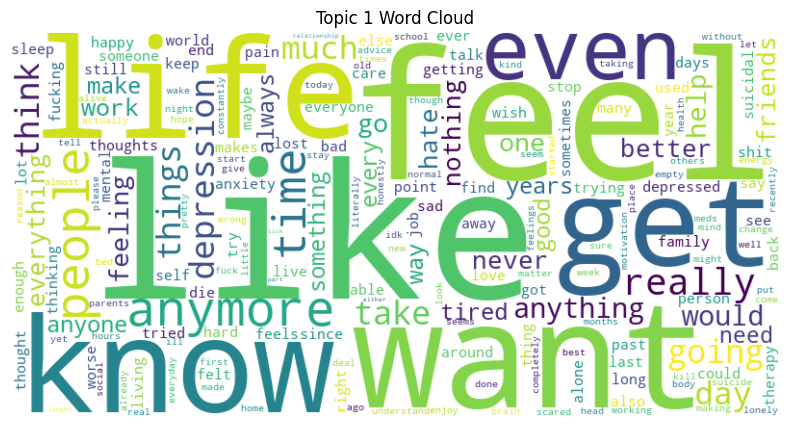

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize



# Define additional stop words
additional_stopwords = set(['I', 'Not', 'and', 'my', 'the'])

# Remove stopwords
stop_words = set(stopwords.words('english')).union(additional_stopwords)

# Separate comments by topic
topic_0_comments = df[df['topic'] == 0]['processed_comment']
topic_1_comments = df[df['topic'] == 1]['processed_comment']

# Function to generate word cloud and frequency distribution
def generate_wordcloud_and_frequency(text, title):
    # Tokenize the text and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Create a frequency distribution
    freq_dist = FreqDist(filtered_tokens)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud and frequency distribution for Topic 0
topic_0_text = ' '.join(topic_0_comments)
generate_wordcloud_and_frequency(topic_0_text, 'Topic 0 Word Cloud')

# Generate word cloud and frequency distribution for Topic 1
topic_1_text = ' '.join(topic_1_comments)
generate_wordcloud_and_frequency(topic_1_text, 'Topic 1 Word Cloud')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline

df_work = pd.DataFrame(df, columns=['text', 'topic'])

# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df_work['text'] = df_work['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_work['text'], df_work['topic'], test_size=0.2, random_state=42)

# Build the model
model = make_pipeline(CountVectorizer(), RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2248
           1       0.89      0.78      0.83      1825

    accuracy                           0.86      4073
   macro avg       0.86      0.85      0.85      4073
weighted avg       0.86      0.86      0.85      4073



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

# Preprocessing
X = df_work['text']
y = df_work['topic']

# Tokenize and pad sequences
max_words = 1000
max_len = 50

tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Make predictions on the test set
predictions = model.predict(X_test)

# You may want to threshold the predictions based on your problem (e.g., >0.5 for binary classification)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Display classification report
print(classification_report(y_test, binary_predictions))

Epoch 1/10
408/408 [==============================] - 8s 17ms/step - loss: 0.4404 - accuracy: 0.7930 - val_loss: 0.3723 - val_accuracy: 0.8454
Epoch 2/10
408/408 [==============================] - 7s 16ms/step - loss: 0.3252 - accuracy: 0.8683 - val_loss: 0.3592 - val_accuracy: 0.8496
Epoch 3/10
408/408 [==============================] - 7s 16ms/step - loss: 0.2956 - accuracy: 0.8798 - val_loss: 0.3630 - val_accuracy: 0.8484
Epoch 4/10
408/408 [==============================] - 7s 17ms/step - loss: 0.2693 - accuracy: 0.8874 - val_loss: 0.3585 - val_accuracy: 0.8472
Epoch 5/10
408/408 [==============================] - 7s 16ms/step - loss: 0.2576 - accuracy: 0.8932 - val_loss: 0.3935 - val_accuracy: 0.8444
Epoch 6/10
408/408 [==============================] - 7s 16ms/step - loss: 0.2408 - accuracy: 0.8998 - val_loss: 0.3814 - val_accuracy: 0.8285
Epoch 7/10
128/128 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8505
Accuracy: 0.85
128/128 [==================

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, predictions))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2248
           1       0.89      0.86      0.88      1825

    accuracy                           0.89      4073
   macro avg       0.89      0.89      0.89      4073
weighted avg       0.89      0.89      0.89      4073

